<a href="https://colab.research.google.com/github/jarodchristiansen/PythonProjects/blob/master/HodlWatchIndicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Method Below in progress to grab all data for btc history to feed into calc pipeline

In [ ]:
# from_symbol = 'BTC'
# to_symbol = 'USD'
# exchange = 'Bitstamp'
# datetime_interval = 'day'


# def get_filename(from_symbol, to_symbol, exchange, datetime_interval, download_date):
#     return '%s_%s_%s_%s_%s.csv' % (from_symbol, to_symbol, exchange, datetime_interval, download_date)
# def download_data(from_symbol, to_symbol, exchange, datetime_interval):
#     supported_intervals = {'minute', 'hour', 'day'}
#     assert datetime_interval in supported_intervals,\
#         'datetime_interval should be one of %s' % supported_intervals
#     print('Downloading %s trading data for %s %s from %s' %
#           (datetime_interval, from_symbol, to_symbol, exchange))
#     base_url = 'https://min-api.cryptocompare.com/data/histo'
#     url = '%s%s' % (base_url, datetime_interval)
#     params = {'fsym': from_symbol, 'tsym': to_symbol,
#               'limit': 2000, 'aggregate': 1,
#               'e': exchange}
#     request = requests.get(url, params=params)
#     data = request.json()
#     return data
# def convert_to_dataframe(data):
#     df = pd.io.json.json_normalize(data, ['Data'])
#     df['datetime'] = pd.to_datetime(df.time, unit='s')
#     df = df[['datetime', 'low', 'high', 'open',
#              'close', 'volumefrom', 'volumeto']]
#     return df
# def filter_empty_datapoints(df):
#     indices = df[df.sum(axis=1) == 0].index
#     print('Filtering %d empty datapoints' % indices.shape[0])
#     df = df.drop(indices)
#     return df

# data = download_data(from_symbol, to_symbol, exchange, datetime_interval)
# btc = convert_to_dataframe(data)
# btc = filter_empty_datapoints(btc)
# current_datetime = datetime.now().date().isoformat()

# btc

# filename = get_filename(from_symbol, to_symbol, exchange, datetime_interval, current_datetime)
# print('Saving data to %s' % filename)
# btc.to_csv(filename, index=False)

In [ ]:
requkes

In [ ]:
# !pip install cryptocompare

# import cryptocompare
# import datetime
# import requests
# import pandas as pd
# from datetime import datetime, timedelta


In [ ]:
def calculateDates():

  # dates = [datetime(2018, 6, 2, 3, 46, 3, 1799)];
  
  dates = [datetime(2017, 12, 10, 3, 46, 3, 1799)];


  # date_N_days_ago = datetime.now() - timedelta(days=1999);
  # dates.append(date_N_days_ago);
  
  for date in range(0):
    date_x_days_before = dates[date] + timedelta(days=1999);
    dates.append(date_x_days_before)
  return dates;


datesArray = calculateDates()
datesArray.append(datetime.now())

datesArray

results = []

for date in datesArray:
  results.append(cryptocompare.get_historical_price_day('BTC', 'USD', limit=2000, exchange='CCCAGG', toTs=date))

results

In [ ]:
from operator import itemgetter

ogFrame = pd.DataFrame()

# sortedArray = sorted(results[0], key=itemgetter('time'), reverse=True)
df = pd.DataFrame(results[0])

# for array in results:
#   if array == results[0]:
#     continue
#   # newlist = sorted(array, key=itemgetter('time'), reverse=True)
#   newList = array;
#   tempFrame = pd.DataFrame(newlist)
#   df = newFrame.append(tempFrame, ignore_index=True)
for array in results:
  if array == results[0]:
    print('in skip condition')
    continue
  else:
    #wires getting corssed here:
    newList = array;
    tempFrame = pd.DataFrame(newList)
    df = df.append(tempFrame, ignore_index=True)

df 

# This is annualized data for bitcoin to look at macro. Larger endpoint call and should probably segmented into its own route. Will copy of some of these segments into their own routes for other assets

# Functional Method Below Grabs data for past 2000 days/calcs all vals. 

In [ ]:
# import requests
# import pandas as pd

# name = 'BTC'
# time = 2000

# priceData = requests.get(
#         'https://min-api.cryptocompare.com/data/v2/histoday?fsym={}&tsym=USD&limit={}'.format(name, time)).json()


# df = pd.DataFrame(priceData['Data']['Data'])
# df['totalvolume'] = df['volumefrom'] + df['volumeto']
# df

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,totalvolume
0,1500508800,2932.81,2282.11,2282.58,310335.43,8.074169e+08,2866.02,direct,,8.077272e+08
1,1500595200,2873.96,2622.54,2866.02,193756.93,5.291548e+08,2675.08,direct,,5.293485e+08
2,1500681600,2876.71,2658.59,2675.08,121917.95,3.419929e+08,2836.53,direct,,3.421148e+08
3,1500768000,2856.67,2675.65,2836.53,108229.76,2.998693e+08,2756.61,direct,,2.999775e+08
4,1500854400,2798.89,2715.69,2756.61,83009.25,2.290474e+08,2763.42,direct,,2.291304e+08
...,...,...,...,...,...,...,...,...,...,...
1996,1672963200,17013.77,16687.42,16825.87,52488.70,8.836421e+08,16946.16,direct,,8.836946e+08
1997,1673049600,16972.62,16905.39,16946.16,11628.45,1.969154e+08,16942.73,direct,,1.969271e+08
1998,1673136000,17132.21,16913.28,16942.73,21159.60,3.591499e+08,17115.81,direct,,3.591711e+08
1999,1673222400,17387.59,17103.20,17115.81,73779.59,1.271944e+09,17179.03,direct,,1.272017e+09


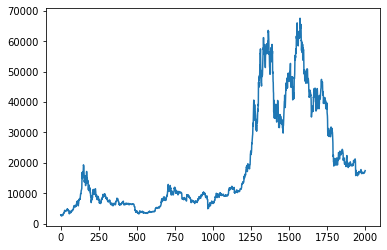

In [ ]:
df['close'].plot(y='time')

In [ ]:
df['norm_return'] = df['close'] / df.iloc[0]['close']
df['totalvolume'] = df['volumefrom'] + df['volumeto']
df.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,totalvolume,norm_return
0,1500508800,2932.81,2282.11,2282.58,310335.43,8.074169e+08,2866.02,direct,,8.077272e+08,1.000000
1,1500595200,2873.96,2622.54,2866.02,193756.93,5.291548e+08,2675.08,direct,,5.293485e+08,0.933378
2,1500681600,2876.71,2658.59,2675.08,121917.95,3.419929e+08,2836.53,direct,,3.421148e+08,0.989710
3,1500768000,2856.67,2675.65,2836.53,108229.76,2.998693e+08,2756.61,direct,,2.999775e+08,0.961825
4,1500854400,2798.89,2715.69,2756.61,83009.25,2.290474e+08,2763.42,direct,,2.291304e+08,0.964201


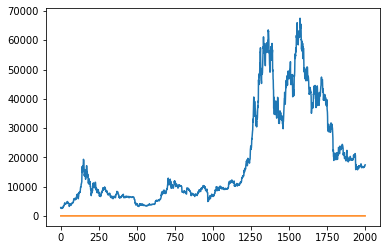

In [ ]:
df['close'].plot(y='time')
df['norm_return'].plot(y='time')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


volume = df['totalvolume']
price = df['close'] 
window = 365


df = df.assign(VWAP=((volume * price).cumsum() / volume.cumsum()).ffill())
df = df.assign(TWAP=(price.cumsum() / len(price)).ffill())
returns = (df.close - df.close.shift(1))/df.close.shift(1)


df['returns'] = returns


rolling = df['returns'].rolling(window=window)
rolling_sharpe_s = np.sqrt(window) * (rolling.mean() / rolling.std())


df['rolling_sharpe'] = rolling_sharpe_s

# results = []
# for ind in df.index:
#     # print(df['Name'][ind], df['Stream'][ind])
#     results.append({'time': df['time'][ind], 'high': df['high'][ind], 'low': df['low'][ind], 'open': df['open'][ind], 'volumefrom': df['volumefrom'][ind], 'volumeto': df['volumeto'][ind], 'close': df['close'][ind], 'totalvolume': df['totalvolume'][ind], 'VWAP': df['VWAP'][ind], 'TWAP': df['TWAP'][ind], 'returns': df['returns'][ind], 'rolling_sharpe': df['rolling_sharpe'][ind]})
#     print({'time': df['time'][ind]})

result = df.to_json(orient="records")
dictFrame = df.to_dict(orient='records')
result
# sharpe = df['rolling_sharpe'];
# vwap = df['VWAP']
# twap = df['TWAP']
# price = df['close']

'[{"time":1500508800,"high":2932.81,"low":2282.11,"open":2282.58,"volumefrom":310335.43,"volumeto":807416890.8799999952,"close":2866.02,"conversionType":"direct","conversionSymbol":"","totalvolume":807727226.3099999428,"norm_return":1.0,"VWAP":2866.02,"TWAP":1.4322938531,"returns":null,"rolling_sharpe":null},{"time":1500595200,"high":2873.96,"low":2622.54,"open":2866.02,"volumefrom":193756.93,"volumeto":529154789.9700000286,"close":2675.08,"conversionType":"direct","conversionSymbol":"","totalvolume":529348546.9000000358,"norm_return":0.9333779946,"VWAP":2790.4268185437,"TWAP":2.7691654173,"returns":-0.0666220054,"rolling_sharpe":null},{"time":1500681600,"high":2876.71,"low":2658.59,"open":2675.08,"volumefrom":121917.95,"volumeto":341992860.1999999881,"close":2836.53,"conversionType":"direct","conversionSymbol":"","totalvolume":342114778.1499999762,"norm_return":0.9897104696,"VWAP":2799.8197845077,"TWAP":4.1867216392,"returns":0.0603533352,"rolling_sharpe":null},{"time":1500768000,"hig

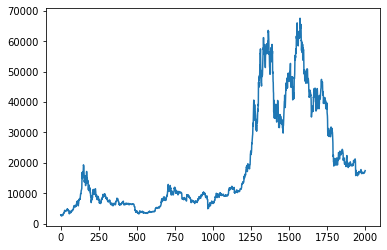

In [ ]:
df['close'].plot(y='time')
# df['VWAP'].plot(y='time')
# df['TWAP'].plot(y='time')


In [ ]:
# df['rolling_sharpe'] = pd.to_numeric(df['rolling_sharpe'])

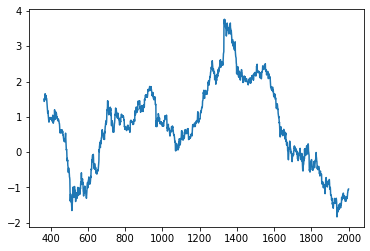

In [ ]:
df['rolling_sharpe'].plot(y='time')

In [ ]:
df

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,totalvolume,norm_return,VWAP,TWAP,returns,rolling_sharpe
0,1500508800,2932.81,2282.11,2282.58,310335.43,8.074169e+08,2866.02,direct,,8.077272e+08,1.000000,2866.020000,1.432294,NaN,NaN
1,1500595200,2873.96,2622.54,2866.02,193756.93,5.291548e+08,2675.08,direct,,5.293485e+08,0.933378,2790.426819,2.769165,-0.066622,NaN
2,1500681600,2876.71,2658.59,2675.08,121917.95,3.419929e+08,2836.53,direct,,3.421148e+08,0.989710,2799.819785,4.186722,0.060353,NaN
3,1500768000,2856.67,2675.65,2836.53,108229.76,2.998693e+08,2756.61,direct,,2.999775e+08,0.961825,2793.270587,5.564338,-0.028175,NaN
4,1500854400,2798.89,2715.69,2756.61,83009.25,2.290474e+08,2763.42,direct,,2.291304e+08,0.964201,2790.173326,6.945357,0.002470,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1672963200,17013.77,16687.42,16825.87,52488.70,8.836421e+08,16946.16,direct,,8.836946e+08,5.912785,29620.322880,19169.629720,0.007149,-1.139710
1997,1673049600,16972.62,16905.39,16946.16,11628.45,1.969154e+08,16942.73,direct,,1.969271e+08,5.911588,29619.047918,19178.096852,-0.000202,-1.085145
1998,1673136000,17132.21,16913.28,16942.73,21159.60,3.591499e+08,17115.81,direct,,3.591711e+08,5.971979,29616.754942,19186.650480,0.010216,-1.074347
1999,1673222400,17387.59,17103.20,17115.81,73779.59,1.271944e+09,17179.03,direct,,1.272017e+09,5.994037,29608.682079,19195.235702,0.003694,-1.075449


In [ ]:
import pymongo
import json
from pymongo import MongoClient, InsertOne

client = pymongo.MongoClient('YOUR_CONNECTION_STRING_HERE')
db = client.Crypto_Watch
collection = db['btc_macros']
requesting = []

# for jsonObj in dictFrame:
#     result = collection.insert_one(jsonObj)

collection.insert_many(dictFrame)

In [ ]:
result = df.dtypes
result

time                  int64
close               float64
high                float64
low                 float64
open                float64
volumefrom          float64
volumeto            float64
conversionType       object
conversionSymbol     object
norm_return         float64
totalvolume         float64
VWAP                float64
TWAP                float64
returns             float64
rolling_sharpe      float64
dtype: object